## **Color Images from Gray**

### **준비 사항: 패키지 불러오기**

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow as keras
from tensorflow.keras import layers
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import natsort
from tensorflow.keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from tensorflow.keras.models import Sequential

### **데이터셋 불러오기 및 데이터셋 탐색**

In [8]:
SIZE = 160
color_img = []
path = '/content/drive/MyDrive/landscapeImages/color/'
files = os.listdir(path)
files = natsort.natsorted(files)

In [9]:
for i in tqdm(files):    
    if i == '2500.jpg':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        color_img.append(img_to_array(img))

  1%|          | 72/7129 [01:19<2:09:32,  1.10s/it] 


KeyboardInterrupt: ignored

In [ ]:
SIZE = 160
gray_img = []
path = '/content/drive/MyDrive/landscapeImages/gray/'
files = os.listdir(path)
files = natsort.natsorted(files)

In [ ]:
for i in tqdm(files):    
    if i == '2500.jpg':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        gray_img.append(img_to_array(img))

 35%|███▌      | 2500/7134 [00:12<00:22, 201.76it/s]


In [ ]:
def plot_images(color,grayscale):
    plt.figure(figsize=(5,5))
    plt.subplot(1,3,1)
    plt.title('Color', color = 'green', fontsize = 8)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale ', color = 'black', fontsize = 8)
    plt.imshow(grayscale)
   
    plt.show()

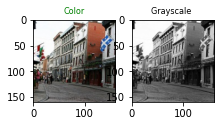

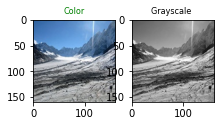

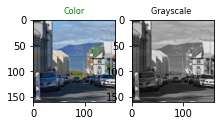

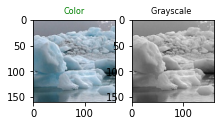

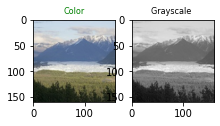

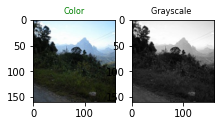

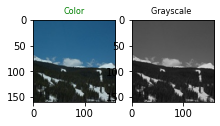

In [ ]:
for i in range(3,10):
     plot_images(color_img[i],gray_img[i])

In [ ]:
train_gray_image = gray_img[:2300]
train_color_image = color_img[:2300]
test_gray_image = gray_img[2300:2500]
test_color_image = color_img[2300:]
# reshaping
train_g = np.reshape(train_gray_image,(len(train_gray_image),SIZE,SIZE,3))
train_c = np.reshape(train_color_image, (len(train_color_image),SIZE,SIZE,3))
print('Train color image shape:',train_c.shape)
test_g = np.reshape(test_gray_image,(len(test_gray_image),SIZE,SIZE,3))
test_c = np.reshape(test_color_image, (len(test_color_image),SIZE,SIZE,3))
print('Test color image shape',test_c.shape)

Train color image shape: (2300, 160, 160, 3)
Test color image shape (200, 160, 160, 3)


### **Generative Images**

In [ ]:
def model() :
    inp = tf.keras.layers.Input(shape=(160,160,3))
    conv1 = tf.keras.layers.Conv2D(16,3,padding='same',activation='relu') (inp)
    conv2 = tf.keras.layers.Conv2D(32,3,padding='same',activation='relu') (conv1)
    conv3 = tf.keras.layers.Conv2D(64,3,padding='same',activation='relu') (conv2)
    conv4 = tf.keras.layers.Conv2D(128,3,padding='same',activation='relu') (conv3)
    convt1 = tf.keras.layers.Conv2DTranspose(128,3,padding='same',activation='relu') (conv4)
    convt2 = tf.keras.layers.Conv2DTranspose(64,3,padding='same',activation='relu') (convt1)
    convt3 = tf.keras.layers.Conv2DTranspose(32,3,padding='same',activation='relu') (convt2)
    convt4 = tf.keras.layers.Conv2DTranspose(16,3,padding='same',activation='relu') (convt3)
    out = tf.keras.layers.Conv2DTranspose(3,3,padding='same',activation='sigmoid') (convt4)
    
    model = tf.keras.models.Model(inp,out)
    model.summary()
    return model

model = model()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 160, 160, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 160, 160, 32)      4640      
                                                                 
 conv2d_6 (Conv2D)           (None, 160, 160, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 160, 160, 128)     73856     
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 160, 160, 128)    147584    
 ranspose)                                                       
                                                           

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.0001)
model.compile(optimizer=optimizer,loss='mse')

In [ ]:
model.fit(train_g,train_c,epochs=10,batch_size=32)

Epoch 1/10
72/72 [==============================] - 27s 355ms/step - loss: 0.0533
Epoch 2/10
72/72 [==============================] - 26s 360ms/step - loss: 0.0222
Epoch 3/10
72/72 [==============================] - 26s 365ms/step - loss: 0.0179
Epoch 4/10
72/72 [==============================] - 27s 369ms/step - loss: 0.0157
Epoch 5/10
72/72 [==============================] - 27s 375ms/step - loss: 0.0140
Epoch 6/10
72/72 [==============================] - 27s 376ms/step - loss: 0.0128
Epoch 7/10
72/72 [==============================] - 27s 377ms/step - loss: 0.0120
Epoch 8/10
72/72 [==============================] - 27s 376ms/step - loss: 0.0114
Epoch 9/10
72/72 [==============================] - 27s 377ms/step - loss: 0.0105
Epoch 10/10
72/72 [==============================] - 27s 375ms/step - loss: 0.0101


In [ ]:
def plot_images(color,grayscale,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color', color = 'green', fontsize = 8)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale', color = 'black', fontsize = 8)
    plt.imshow(grayscale)
    plt.subplot(1,3,3)
    plt.title('Predicted', color = 'Red', fontsize = 8)
    plt.imshow(predicted)
   
    plt.show()

for i in range(60,70):
    predicted = np.clip(model.predict(test_g[i].reshape(1,160,160,3)),0.0,1.0).reshape(160, 160,3)
    plot_images(test_c[i],test_g[i],predicted)

Output hidden; open in https://colab.research.google.com to view.